In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
import os
all_dfs = []
directory = os.fsencode("feature data/")
for file in os.listdir(directory):
     filename = os.fsdecode(file)
     if filename.endswith("0.csv"): 
         all_dfs.append(pd.read_csv("feature data/" + filename, header=None))

In [3]:
data = pd.concat(all_dfs)
data

,0,1,2,3,4,5,6
0,0.0,0.193878,0.060185,0.181122,0.062500,0.344388,0.131944
1,0.0,0.185279,0.059908,0.159898,0.064516,0.327411,0.135945
2,0.0,0.183168,0.051454,0.148515,0.058166,0.316832,0.131991
3,0.0,0.178756,0.048611,0.168394,0.053241,0.341969,0.120370
4,0.0,0.180662,0.047506,0.152672,0.047506,0.318066,0.125891
...,...,...,...,...,...,...,...
16,10.0,0.169096,0.066667,0.177843,0.054545,0.346939,0.148485
17,10.0,0.165165,0.039514,0.171171,0.048632,0.360360,0.142857
18,10.0,0.164740,0.038690,0.176301,0.035714,0.369942,0.142857
19,10.0,0.161111,0.046784,0.172222,0.046784,0.336111,0.143275


In [4]:
X = data.iloc[:, [i for i in range(1, 7)]]
Y = data.iloc[:, 0]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
X = pd.DataFrame(scaler.fit_transform(X))
Y = pd.DataFrame(np.array(Y))
X.columns = ["Left Eye Width", "Left Eye Height", "Right Eye Width", "Right Eye Height", "Mouth Width", "Mouth Height"]
X

,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,0.790406,0.475776,0.661817,0.454649,0.493465,0.389152
1,0.704127,0.472364,0.503346,0.476794,0.419178,0.406707
2,0.682945,0.368381,0.418349,0.407039,0.372883,0.389357
3,0.638675,0.333411,0.566777,0.352945,0.482880,0.338359
4,0.657792,0.319817,0.449387,0.289953,0.378285,0.362585
...,...,...,...,...,...,...
966,0.541740,0.555501,0.637328,0.367276,0.504627,0.461740
967,0.502294,0.221509,0.587515,0.302325,0.563358,0.437043
968,0.498027,0.211383,0.625814,0.160434,0.605287,0.437043
969,0.461614,0.310932,0.595363,0.282020,0.457247,0.438876


In [7]:
pd.concat([Y, X], axis=1).to_csv("feature data/scaled.csv", index=False)

In [8]:
data = pd.read_csv("feature data/scaled.csv")
data

,0,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,0.0,0.790406,0.475776,0.661817,0.454649,0.493465,0.389152
1,0.0,0.704127,0.472364,0.503346,0.476794,0.419178,0.406707
2,0.0,0.682945,0.368381,0.418349,0.407039,0.372883,0.389357
3,0.0,0.638675,0.333411,0.566777,0.352945,0.482880,0.338359
4,0.0,0.657792,0.319817,0.449387,0.289953,0.378285,0.362585
...,...,...,...,...,...,...,...
966,10.0,0.541740,0.555501,0.637328,0.367276,0.504627,0.461740
967,10.0,0.502294,0.221509,0.587515,0.302325,0.563358,0.437043
968,10.0,0.498027,0.211383,0.625814,0.160434,0.605287,0.437043
969,10.0,0.461614,0.310932,0.595363,0.282020,0.457247,0.438876


In [9]:
X = data.iloc[:, [i for i in range(1, 7)]]
Y = data.iloc[:, 0]

In [10]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, shuffle=False)

In [30]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, 
                                    max_depth = 6, 
                                    criterion = 'entropy', 
                                    bootstrap=True,
                                   )
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', max_depth=6)

In [31]:
from sklearn.metrics import accuracy_score
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)
accuracy

0.7333333333333333

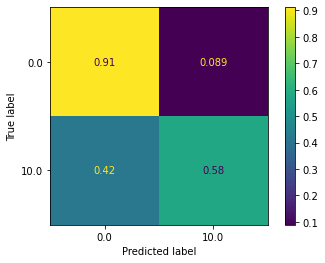

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_Test, Y_Test, normalize="true")
plt.savefig("confusion_matrix_rf.png")

In [34]:
from IPython.display import SVG
from graphviz import Source
from sklearn.tree import export_graphviz
graph = Source( export_graphviz(classifier[0], out_file=None, feature_names=X.columns, class_names = ["Non-Drowsy", "Drowsy"],
                               filled=True, rounded=True))
graph.format = 'png'
graph.render('tree1', view=True)

'tree1.png'

In [68]:
import joblib
joblib.dump(classifier, "rf_model.joblib")

['rf_model.joblib']